Name: Jingping Yu
ID: 6205835871

Each file containis 6 time series collected from activities
of the same person, which are called avg rss12, var rss12, avg rss13, var rss13, vg rss23, and ar rss23. There are 88 instances in the dataset, each of which con- tains 6 time series and each time series has 480 consecutive values.
Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

(b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # load all the datasets in the data directory
import os
import re

# functions that perform human sorting
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

path = "../data/AReM"
file_list = os.listdir(path)
del file_list[0]
del file_list[0]
del file_list[2]
print(file_list)

data_dic = {} # a dictionary that holds file as keys and dataset as a list. 
name = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13','avg_rss23', 'var_rss23']
all_datasets= [] # it stores a list of all datasets
all_label = [] # it stores all the y labels of all 88 datasets

# iterate through the files to get each datset stored in the dictionary IN ORDER. 
for file in file_list:
    dataset_list = []
    csv_list = sorted(os.listdir("../data/AReM/" + file), key=natural_keys)

    for csv in csv_list:
        if file == 'bending2' and csv == 'dataset4.csv':
            data = pd.read_csv("../data/AReM/" + file + "/" + csv, skiprows = 5, names = name, delimiter = " ", index_col = False)
        else:
            data = pd.read_csv("../data/AReM/" + file + "/" + csv, skiprows = 5, names = name, index_col = False)
        data = data.drop(columns=['time'])
        dataset_list.append(data)
        all_datasets.append(data)
        all_label.append(file)
        
    data_dic[file] = dataset_list


['bending1', 'walking', 'bending2', 'standing', 'sitting', 'lying', 'cycling']


In [370]:
# split the data into training and test sets
# test: 1,2 in bending 1 and bending 2 + 1,2,3 in other directories
# train: all others

y_train = []
y_test = []

train_set = {}
test_set = {} 

alltrain = list()
alltest = list()

for key in data_dic.keys():

    if key.find('bending') != -1: 
        index = 2 
    else: 
        index = 3
    
    value_datasets = data_dic[key] # a list of datasets in the specified folder
    test_list=value_datasets[:index] # store the datasets in a list
    train_list=value_datasets[index:]
    
    labels= len(value_datasets) * [key] # a list stores the 'folder' name of datasets stored in train_set and test_set
    y_test.extend(labels[:index])
    y_train.extend(labels[index:])
   
    # {folder1: [dataset1, dataset2...], folder2:...}
    test_set[key] = test_list 
    alltest.extend(test_list)
    
    train_set[key] = train_list 
    alltrain.extend(train_list) 
    

(c) Feature Extraction
Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.
i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).


Time-domain features usually used in TSC are descriptive statistics:
1. Maximum 
2. Minimum
3. Mean
4. Median
5. Standard deviation
6. 1st and 3rd quartiles
7. Skewdness
8. Kurtosis

ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.
where, for example, 1st quart6, means the first quartile of the sixth time series in each of the 88 instances.

In [371]:
def describe_stats(data,dataframe):
    
    column = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13','avg_rss23', 'var_rss23']
    features = ['min', 'max', 'mean', '50%', 'std', '25%', '75%']
    for i in range(len(data)): # iterate through each datasets
        dataset=data[i] 
        row=list()
        
        # iterate through each column and get the descriptive statistics: 6 col * 7 features = 42 columns for new df
        for name in column:
            stats = dataset[name].describe()
            for feature in features:
                row.append(stats[feature])
        
        dataframe_len = len(dataframe)
        dataframe.loc[dataframe_len] = row
    return dataframe

# create an empty dataframe to hold the data
df=pd.DataFrame(columns=['min1','max1','mean1','median1','Std1','1st_quart1','3rd_quart1','min2','max2','mean2','median2','Std2','1st_quart2','3rd_quart2','min3','max3','mean3','median3','Std3','1st_quart3','3rd_quart3','min4','max4','mean4','median4','Std4','1st_quart4','3rd_quart4','min5','max5','mean5','median5','Std5','1st_quart5','3rd_quart5','min6','max6','mean6','median6','Std6','1st_quart6','3rd_quart6'])
features_df = describe_stats(all_datasets,df)
features_df

,min1,max1,mean1,median1,Std1,1st_quart1,3rd_quart1,min2,max2,mean2,...,Std5,1st_quart5,3rd_quart5,min6,max6,mean6,median6,Std6,1st_quart6,3rd_quart6
0,37.25,45.00,40.624792,40.50,1.476967,39.2500,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.0000,0.0,1.92,0.570583,0.43,0.582915,0.0000,1.3000
1,38.00,45.67,42.812812,42.50,1.435550,42.0000,43.6700,0.0,1.22,0.372438,...,1.995255,32.0000,34.5000,0.0,3.11,0.571083,0.43,0.601010,0.0000,1.3000
2,35.00,47.40,43.954500,44.33,1.558835,43.0000,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.5000,0.0,1.79,0.493292,0.43,0.513506,0.0000,0.9400
3,33.00,47.75,42.179813,43.50,3.670666,39.1500,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.3300,0.0,2.18,0.613521,0.50,0.524317,0.0000,1.0000
4,33.00,45.75,41.678063,41.75,2.243490,41.3300,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.2500,0.0,1.79,0.383292,0.43,0.389164,0.0000,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,27.00,44.33,36.541667,36.00,4.018922,33.2500,39.8125,0.0,10.43,2.847958,...,3.088141,15.0000,19.5000,0.0,9.18,3.225458,2.87,1.769758,1.8850,4.2625
84,18.50,44.25,35.752354,36.00,4.614802,33.0000,39.3300,0.0,12.60,3.328104,...,3.120057,14.0000,18.0625,0.0,9.39,3.069667,2.77,1.748326,1.7975,4.0600
85,19.00,43.75,35.879875,36.00,4.614878,33.0000,39.5000,0.0,11.20,3.414312,...,3.537635,14.7500,19.6900,0.0,8.50,3.093021,2.93,1.626034,1.8900,4.0600
86,23.33,43.50,36.244083,36.75,3.822016,33.4575,39.2500,0.0,9.71,2.736021,...,3.617702,15.7500,21.0000,0.0,11.15,3.530500,3.11,1.963685,2.1700,4.6175


iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.


In [372]:
features_std = pd.DataFrame(features_df.std())
features_std

,0
min1,9.569975
max1,4.394362
mean1,5.335718
median1,5.440054
Std1,1.772153
1st_quart1,6.153590
3rd_quart1,5.138925
min2,0.000000
max2,5.062729
mean2,1.574164


In [373]:
# have to pip install bootstrapped
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
# 90% bootstrap confidence interval for the standard deviation of each feature

ci = list()
# create a new dataframe to hold the ci data
ci_df = pd.DataFrame(columns = ['confidence interval'])

for column in features_df:
    # have to convert each column into numpy array to use bootstrapped library
    col = np.array(features_df[column])
    # this returns the value of standard deviation and a tuple of confidence interval for each time-domain feature
    ci = bs.bootstrap(col, stat_func=bs_stats.std, alpha = 0.1)
    ci_df.loc[column] = '['+ str(round(ci.lower_bound, 2)) + ','+ str(round(ci.upper_bound,2)) + ']'
ci_df

,confidence interval
min1,"[8.29,10.83]"
max1,"[3.49,5.42]"
mean1,"[4.76,5.93]"
median1,"[4.85,6.04]"
Std1,"[1.58,1.96]"
1st_quart1,"[5.64,6.69]"
3rd_quart1,"[4.4,5.93]"
min2,"[0.0,0.0]"
max2,"[4.69,5.47]"
mean2,"[1.44,1.75]"


iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

<b>From the result generated, I think the max, mean, and 3rd quartile are the most important time-domain features in this case, because they have wider spread distribution in all 6 time-series.

(d) Binary Classification Using Logistic Regression

i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).4


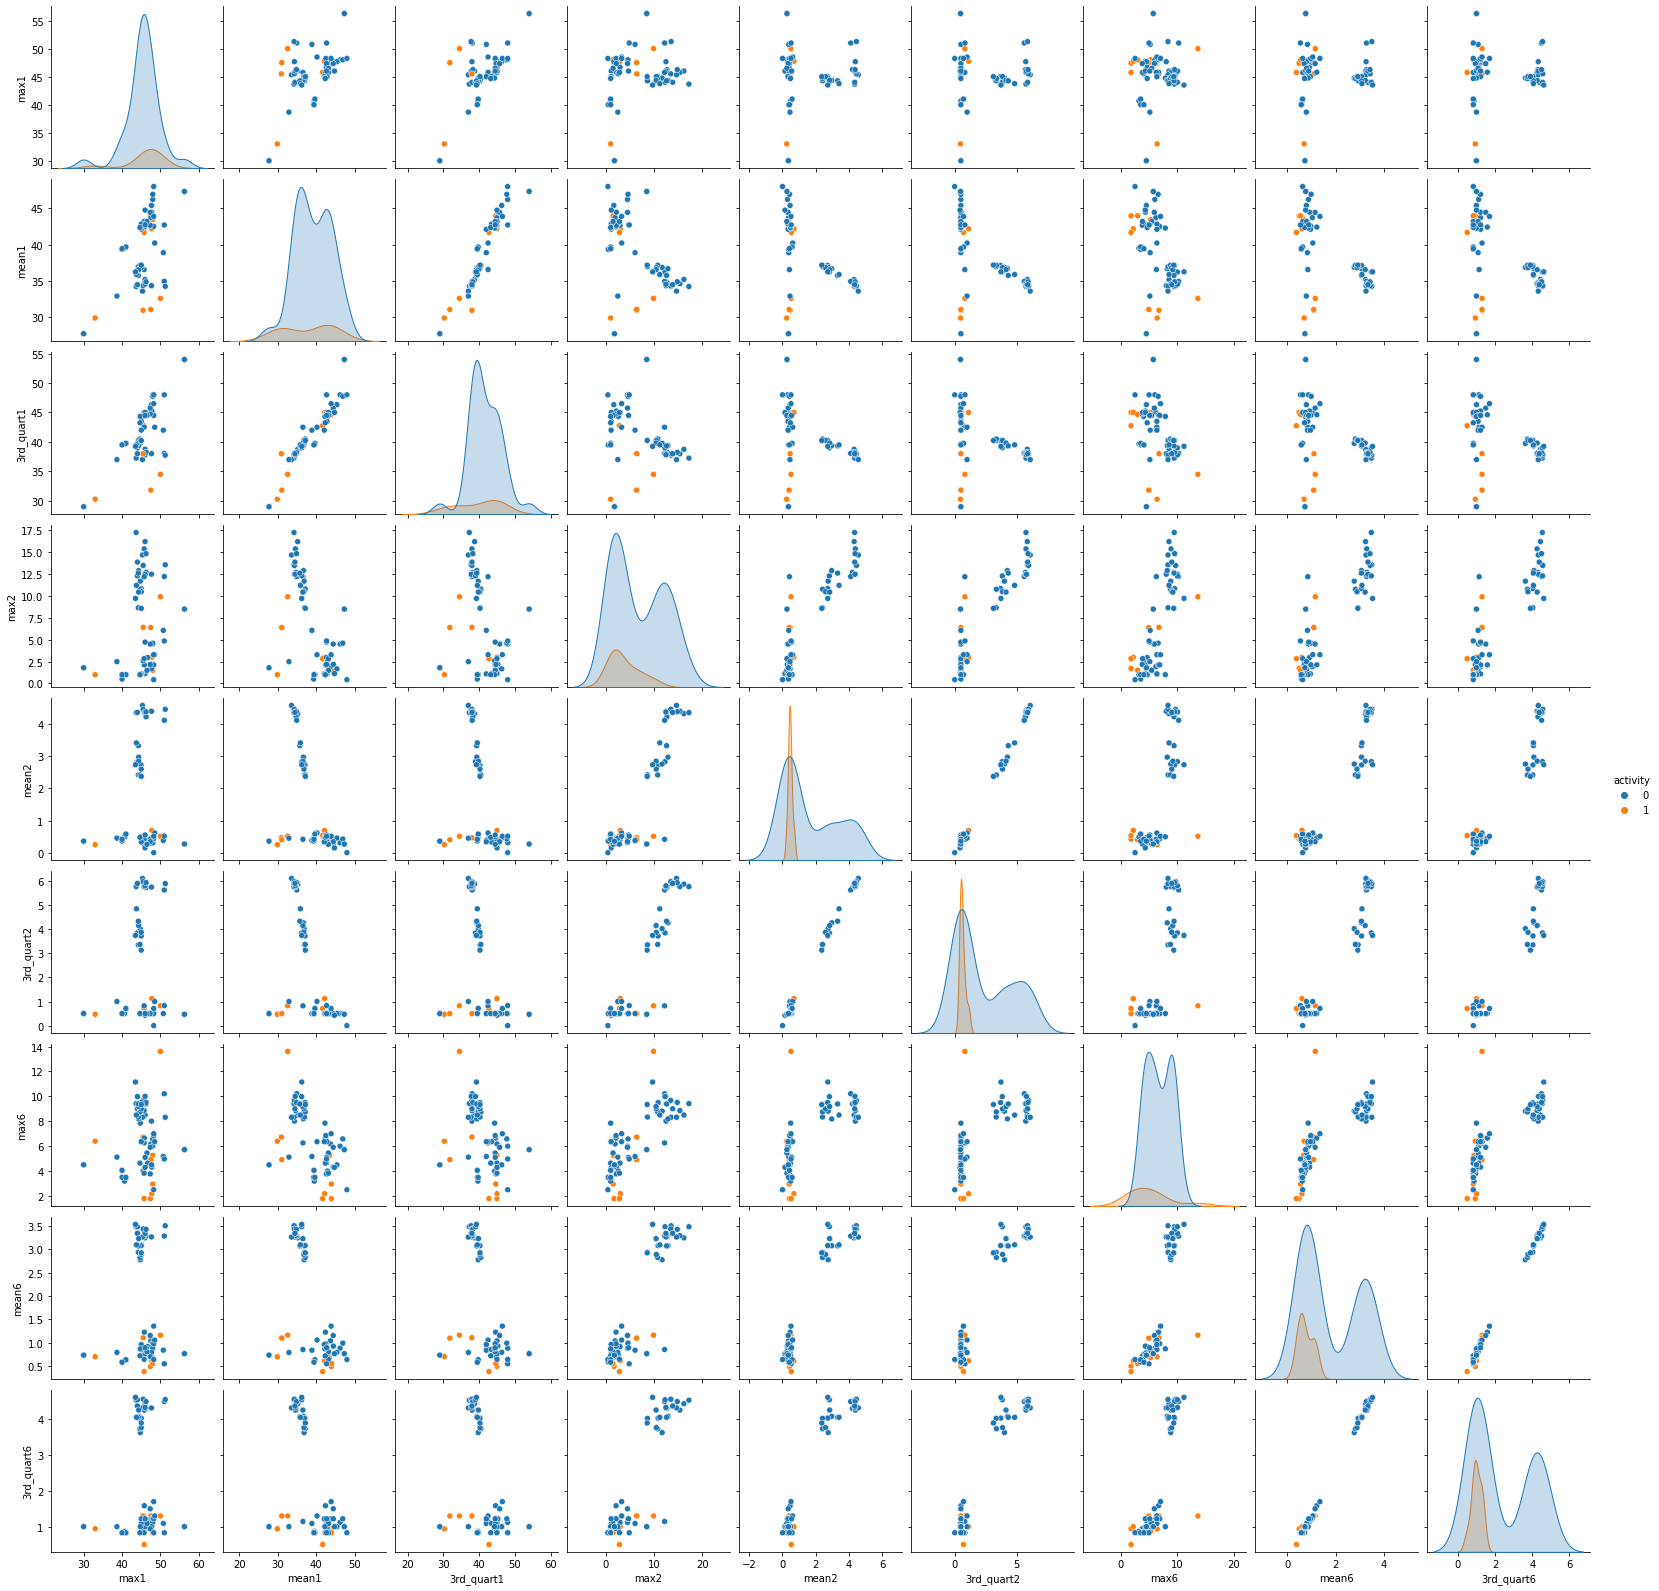

In [374]:
train_df1=pd.DataFrame(columns=['min1','max1','mean1','median1','Std1','1st_quart1','3rd_quart1','min2','max2','mean2','median2','Std2','1st_quart2','3rd_quart2','min3','max3','mean3','median3','Std3','1st_quart3','3rd_quart3','min4','max4','mean4','median4','Std4','1st_quart4','3rd_quart4','min5','max5','mean5','median5','Std5','1st_quart5','3rd_quart5','min6','max6','mean6','median6','Std6','1st_quart6','3rd_quart6'])
train_feature_df1 = describe_stats(alltrain, train_df1)

scatter_feature_df1 = train_feature_df1[['max1', 'mean1','3rd_quart1','max2', 'mean2','3rd_quart2','max6', 'mean6','3rd_quart6']]

y_label1 = []
for label in y_train:
    if label.find('bending') != -1:
        y_label1.append(1)
    else:
        y_label1.append(0)
scatter_feature_df1['activity'] = y_label1

sns.pairplot(scatter_feature_df1, hue = 'activity')

ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 1(d)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 1(d)i?

In [375]:
# alltrain: 69 instances
# alltest: 19 instances
# alldatasets: 88 instances

# function: split the train/test set
def data_split(datasets_list, num_split):
    
    # store the new column name of each instance
    column = ["avg_rss12", "var_rss12", "avg_rss13", "var_rss13","avg_rss23", "var_rss23"]
    col_name = []
    for i in range(1,6*num_split+1):
        col_name.extend(["max"+str(i),"mean"+str(i),"3rd_quartile"+str(i)])
    
    new_list = []
    split_datasets_list = list()
    
    for dataset in datasets_list:
        # this function split the datafram into chunks of equal number of rows
        split_list = np.array_split(dataset, num_split) # return a list of splited dataframes: # = num_split
        
        row=[] # it stores all the features data of each time series: # = num_split*6*3
        for item in split_list:
            for col in column:
                stats = item[col].describe()
                row.append(stats["max"])
                row.append(stats["mean"])
                row.append(stats["75%"])
        new_list.append(row)

    return pd.DataFrame(new_list, columns=col_name)

# # function: split the y label
# def y_split(label_list, num_split):
#     split_list = []
#     for label in label_list:
#         for i in range(num_split):
#             split_list.append(label)
#     return split_list
# y_train_split = y_split(all_label, 2)

In [376]:
all_split = data_split(all_datasets, 2)
all_ylabel = []
for label in all_label:
    if label.find('bending') != -1:
        all_ylabel.append(1)
    else:
        all_ylabel.append(0)
all_split['activity'] = all_ylabel
all_split

,max1,mean1,3rd_quartile1,max2,mean2,3rd_quartile2,max3,mean3,3rd_quartile3,max4,...,max10,mean10,3rd_quartile10,max11,mean11,3rd_quartile11,max12,mean12,3rd_quartile12,activity
0,42.33,40.946958,42.0000,1.22,0.375667,0.5000,25.67,17.672583,20.2500,7.23,...,5.50,1.076458,1.425,38.25,34.118375,36.5000,1.92,0.552167,0.9400,1
1,44.25,42.643292,43.3300,0.94,0.355000,0.5000,25.33,20.369667,21.5000,5.50,...,5.76,1.109250,1.500,38.50,32.301708,33.7500,3.11,0.533583,0.8700,1
2,46.50,44.057167,45.0000,1.50,0.381042,0.5000,29.25,23.096792,24.0000,2.74,...,4.44,0.501167,0.710,38.25,34.883375,36.2500,1.50,0.388333,0.7100,1
3,47.75,43.278875,45.2500,3.00,0.673292,1.0000,30.00,23.141250,24.8125,4.77,...,5.15,1.171792,1.480,38.50,30.965708,33.7500,2.18,0.586083,0.8700,1
4,45.75,41.621208,44.2500,2.83,0.623083,0.8300,28.25,19.081458,24.0000,6.42,...,2.35,0.568667,0.830,36.00,29.635833,30.5625,1.50,0.347500,0.5000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,44.33,36.644958,40.2700,9.12,2.826458,4.4525,25.25,17.212083,19.5000,9.63,...,8.10,2.849125,3.630,23.33,16.762625,19.0625,9.18,3.206500,4.2225,0
84,44.25,35.692167,39.2500,11.39,3.324208,4.4400,27.00,16.010708,18.0625,9.46,...,8.96,2.889375,3.770,24.33,16.130417,18.2500,8.81,2.966917,3.7400,0
85,43.75,35.694167,39.5625,11.20,3.658042,5.1000,22.75,16.436500,18.5000,8.73,...,8.87,3.235583,4.500,26.50,18.127083,20.5000,7.89,2.936500,3.7000,0
86,42.67,36.342750,39.0000,9.71,2.691917,3.7700,28.00,18.578875,21.0000,9.78,...,8.55,3.219125,4.390,26.67,18.685417,21.0625,11.15,3.513250,4.5000,0


In [377]:
# filter for only 1, 2, 6, 7, 8, 12 time series
# num_ls = [1,2,6] num_split = 2
def ts_feature_filter(num_ls, num_split):
    feature_num_list = []
    for n in num_ls:
        feature_num_list.append(n)
        feature_num_list.append(n+6*(num_split-1))
    feature_num_list = sorted(feature_num_list)
    
    name_list = []
    for n in feature_num_list:
        name_list.append('max'+str(n))
        name_list.append('mean'+str(n))
        name_list.append('3rd_quartile'+str(n))
    name_list.append('activity')
    return name_list

col_name = ts_feature_filter([1,2,6], 2)
scatter_feature_df2 = all_split[col_name]

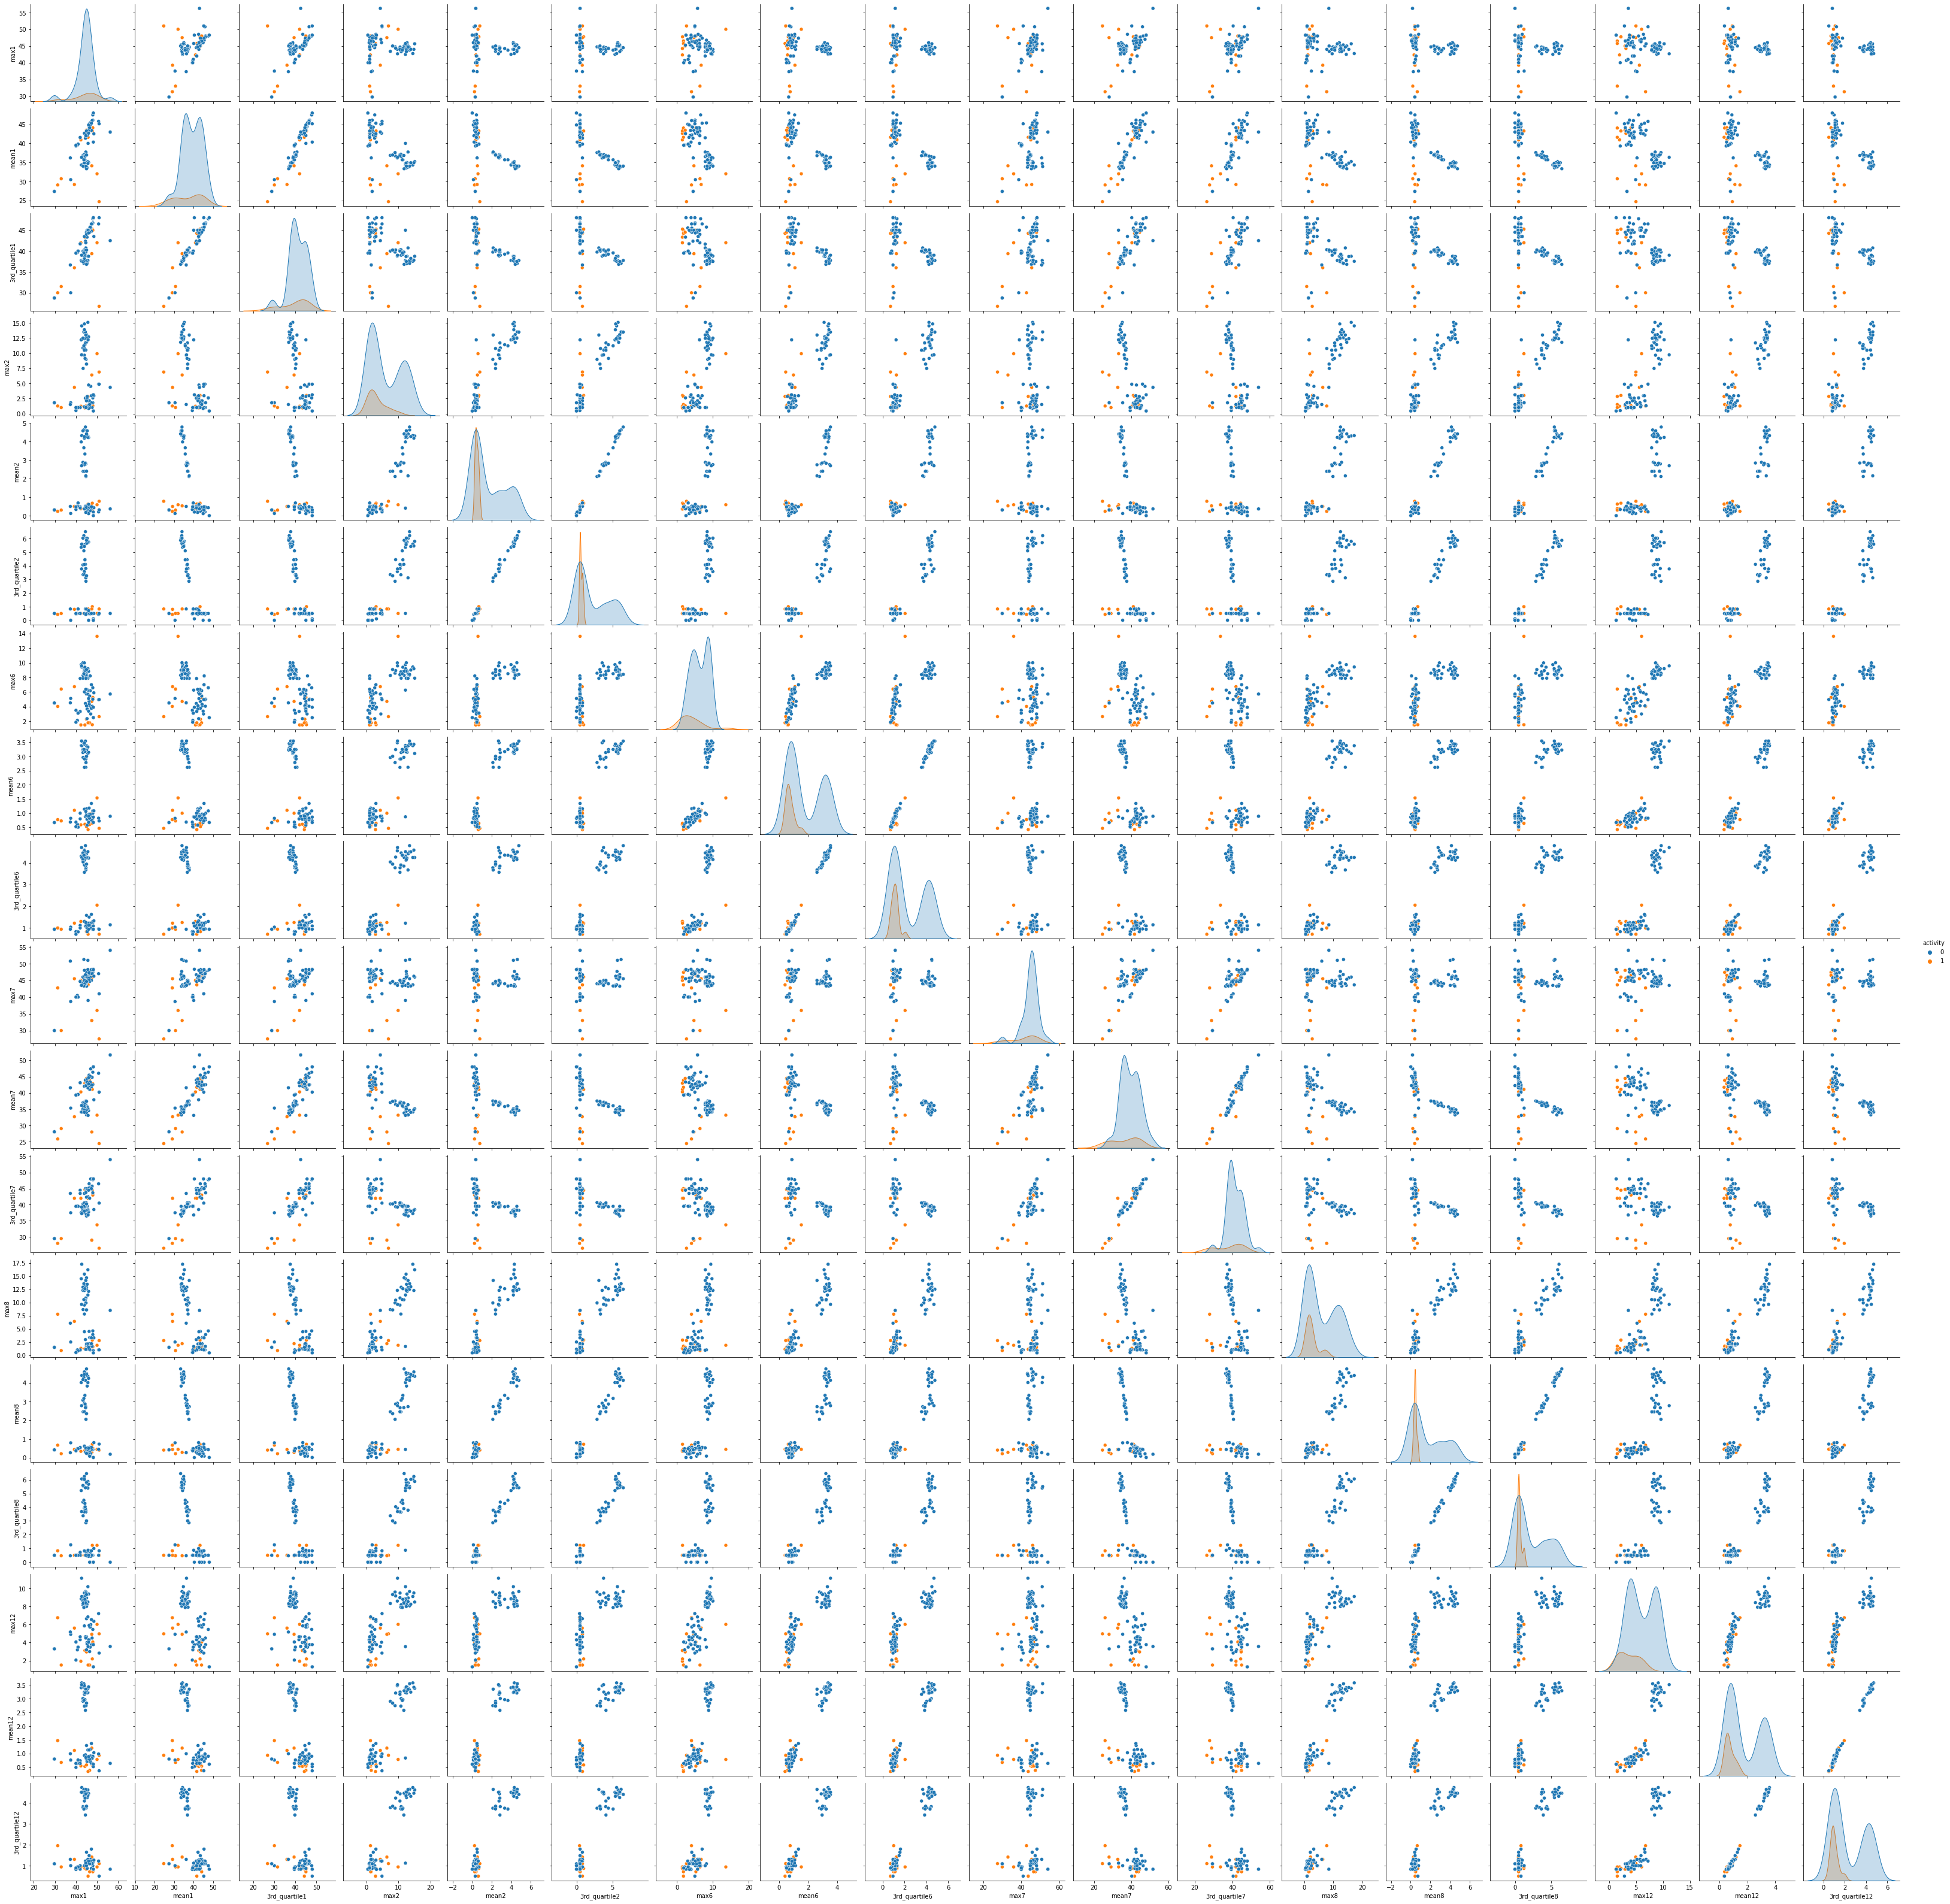

In [378]:
sns.pairplot(scatter_feature_df2, hue = 'activity') # this may take a while, because this is a 18*18 plot

iii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression5 to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features.6 Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem. Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.
In the following, you can see an example of applying Python’s Recursive Feature Elimination, which is a backward selection algorithm, to logistic regression.

In [379]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc
import statistics
import warnings
warnings.filterwarnings('ignore')

In [380]:
L = 20

Y_train = []
Y_test = []
for label in y_train:
    if label.find('bending') != -1:
        Y_train.append(1)
    else:
        Y_train.append(0)
for label in y_test:
    if label.find('bending') != -1:
        Y_test.append(1)
    else:
        Y_test.append(0)

score = {}
selected_feature_df = {}
for l in range(1,L+1,1):
    
    X_train = data_split(alltrain,l)
    reg = LogisticRegression(C=10000, max_iter=10)
    rfecv = RFECV(estimator=reg, step = 1, cv=StratifiedKFold(5, shuffle = True), scoring='accuracy')
    rfecv = rfecv.fit(X_train,Y_train)

    score[l] = rfecv.grid_scores_
    selected_feature = []
    for index, col in enumerate(X_train.columns):
        if rfecv.support_[index] == True:
            selected_feature.append(col)
    selected_feature_df[l] = selected_feature


In [381]:
for key, value in score.items():
    print(str(key) +":"+ str(max(value)))

1:0.9857142857142858
2:0.9714285714285715
3:0.9857142857142858
4:0.9714285714285715
5:0.9714285714285715
6:0.9857142857142858
7:0.9714285714285715
8:0.9714285714285715
9:0.9714285714285715
10:0.9703296703296704
11:0.9714285714285715
12:0.9857142857142858
13:0.9714285714285715
14:0.9714285714285715
15:0.9714285714285715
16:0.9857142857142858
17:0.9714285714285715
18:0.9703296703296704
19:0.9714285714285715
20:0.9857142857142858


In [382]:
print(selected_feature_df[1])

['3rd_quartile1', 'max5', 'mean5']


<b>The best L is 1 with 6 important features: mena1, 3rd_quartile1, max2, max5, mean5, and 3rd_quartile5.

The wrong way is to do the feature selection on the entire training set before the cross validation takes place. 
The right way is to first split the data into training and validation sets and then do the feature selection within each cross validation. 
If we do it the wrong way, when we do the the validation, the features selected have already seen the validation set, which will result in overfit of the model. 

iv.Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.


In [383]:
import scipy.stats as stat
import statsmodels.api as sm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

X_train = data_split(alltrain, 1)
X_train = X_train[selected_feature_df[1]]
reg = LogisticRegression(C=10000, max_iter=10).fit(X_train,Y_train)
Y_pred = reg.predict(X_train)
cm = confusion_matrix(Y_train, Y_pred)
print("The confusion matrix for the classifier on the train data is:")
print(cm)

The confusion matrix for the classifier on the train data is:
[[60  0]
 [ 1  8]]


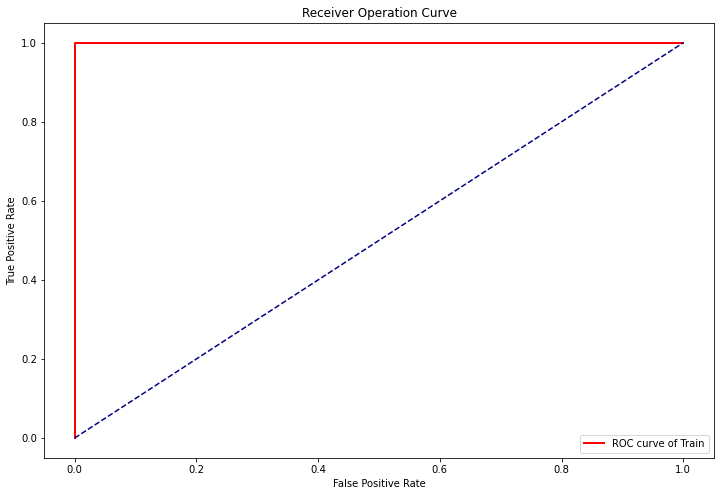

The AUC for train set is:  1.0


In [384]:
train_prob = reg.predict_proba(X_train)
train_prob = train_prob[:, 1] # keep the probability for the postiive outcome only, in this case is bending

fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, train_prob, pos_label = 1)
plt.figure(figsize = (12,8))
plt.plot(fpr_train, tpr_train, lw = 2, color = "red", label = "ROC curve of Train")
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlabel ('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operation Curve')
plt.legend(loc = "lower right")
plt.show()

trainAUC = roc_auc_score(Y_train, train_prob)
print("The AUC for train set is: ", trainAUC)

In [385]:
model = sm.Logit(Y_train,X_train).fit(maxiter = 12)
model.summary()

         Current function value: 0.000143
         Iterations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   69
Model:                          Logit   Df Residuals:                       66
Method:                           MLE   Df Model:                            2
Date:                Sat, 09 Oct 2021   Pseudo R-squ.:                  0.9996
Time:                        12:34:47   Log-Likelihood:             -0.0098905
converged:                      False   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 2.517e-12
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
3rd_quartile1    -8.3857     14.923     -0.562      0.574     -37.635      20.864
max5              4.3834     12.879      0.340      0.734     -20.859      29.626
mean5            11.0997     22.632      0.490      0.624     -33.258      55.458
=================================================================================

Possibly complete quasi-separation: A fraction 0.94 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

<b> A perfect seperation occurs when I tried to get the p-value of all parameters.

v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [386]:
X_test = data_split(alltest,1)
X_test = X_test[selected_feature_df[1]]
Y_test_pred = reg.predict(X_test)
test_score = reg.score(X_test, Y_test)
cm = confusion_matrix(Y_test, Y_test_pred)
print("The confusion matrix for the classifier on the train data is:")
print(cm)
print("The accuracy score for test set is: ", test_score)

The confusion matrix for the classifier on the train data is:
[[15  0]
 [ 0  4]]
The accuracy score for test set is:  1.0


<b>Comparing to the accuracy of training set, the test set has a bit higher accuracy when L = 1. (The maximum accuracy score of the feature in training set is approximately 0.98)

vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

<b>Yes. When I was finding the p-values for the datasets, I received warning in the maximum number of iteration because of the perfect seperation of the data. When the iteration is equal to 13, there are paramters starting to have p-values euqual to 1.

vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

<b>Yes, we can apparently tell the imbalance of dataset from the confusion matrix. 

In [387]:
# data_split (dataset, peice)
# ts_feature_filter (list, peice)
# X_train, Y_train, X_test, Y_test
from sklearn.utils import resample

best_l, best_p = 1, 6

train_df = data_split(alltrain, 1)
train_df['activity'] = Y_train
test_df = data_split(alltest, 1)

# seperate the majority group and the minority group
minor = train_df.loc[train_df.activity == 1]
major = train_df.loc[train_df.activity == 0]

# the original ratio of minor and major 3:20
# target ratio 1:5 = 12:60

# concatenate the two parts to get new training set
minor_up = resample(minor,n_samples=12,random_state=0)
train_resample_df = pd.concat([minor_up, major])
train_resample_df

,max1,mean1,3rd_quartile1,max2,mean2,3rd_quartile2,max3,mean3,3rd_quartile3,max4,mean4,3rd_quartile4,max5,mean5,3rd_quartile5,max6,mean6,3rd_quartile6,activity
17,50.00,32.586208,34.5000,9.90,0.516125,0.8225,28.25,13.941625,18.00,7.40,0.868896,1.1200,33.75,20.345708,23.5000,13.61,1.162042,1.3000,1
0,47.40,43.954500,45.0000,1.70,0.426250,0.5000,29.75,22.122354,24.00,4.44,0.497313,0.8300,38.50,35.588458,36.5000,1.79,0.493292,0.9400,1
3,48.00,43.454958,45.0000,1.58,0.378083,0.5000,27.00,15.793333,18.27,10.03,0.849354,1.1200,33.50,23.034792,24.0000,5.26,0.679646,0.8700,1
3,48.00,43.454958,45.0000,1.58,0.378083,0.5000,27.00,15.793333,18.27,10.03,0.849354,1.1200,33.50,23.034792,24.0000,5.26,0.679646,0.8700,1
19,45.50,30.938104,38.0000,6.40,0.467167,0.5000,32.75,14.589833,20.69,11.42,0.777542,1.1200,36.00,18.389083,20.8125,6.73,1.107354,1.3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,44.33,36.541667,39.8125,10.43,2.847958,4.1500,27.67,16.156063,18.05,9.63,3.055458,4.0300,24.50,17.062625,19.5000,9.18,3.225458,4.2625,0
65,44.25,35.752354,39.3300,12.60,3.328104,4.3300,27.00,16.055021,18.33,9.46,2.871125,3.7800,24.33,16.001271,18.0625,9.39,3.069667,4.0600,0
66,43.75,35.879875,39.5000,11.20,3.414312,4.8450,26.50,16.690375,18.69,8.87,3.128354,4.3225,26.50,17.078312,19.6900,8.50,3.093021,4.0600,0
67,43.50,36.244083,39.2500,9.71,2.736021,3.7400,28.50,18.435708,21.00,9.78,3.129792,4.2400,27.00,18.497146,21.0000,11.15,3.530500,4.6175,0


In [388]:
Y_train_up = train_resample_df.activity
X_train_up = train_resample_df.drop('activity', axis=1)
reg1 = LogisticRegression(max_iter = 1000,C=10000)
model1 = RFECV(estimator= reg1, cv=StratifiedKFold(5), scoring='accuracy').fit(X_train_up, Y_train_up)

score1 = []
score1 = model1.grid_scores_
selected_feature1 = []
# iterate through the column names to see which one get 'True'
for index, col in enumerate(X_train_up.columns):
    if model1.support_[index] == True:
        selected_feature1.append(col) 

# filter the features in the original train set
X_train_up = X_train_up[selected_feature1]

reg1=reg1.fit(X_train_up, Y_train_up)
Y_trainup_pred = reg1.predict(X_train_up)
Y_trainup_prob = reg1.predict_proba(X_train_up)[:,1] # only keep the positive


cm1 = confusion_matrix(Y_train_up , Y_trainup_pred)
print("The selected features are:\n", selected_feature1, '\n')
print("The confusion matrix is:\n", cm1)


The selected features are:
 ['mean1', '3rd_quartile1', '3rd_quartile2', 'max3', '3rd_quartile3', 'max5', 'mean5', '3rd_quartile5', 'max6', 'mean6', '3rd_quartile6'] 

The confusion matrix is:
 [[60  0]
 [ 0 12]]


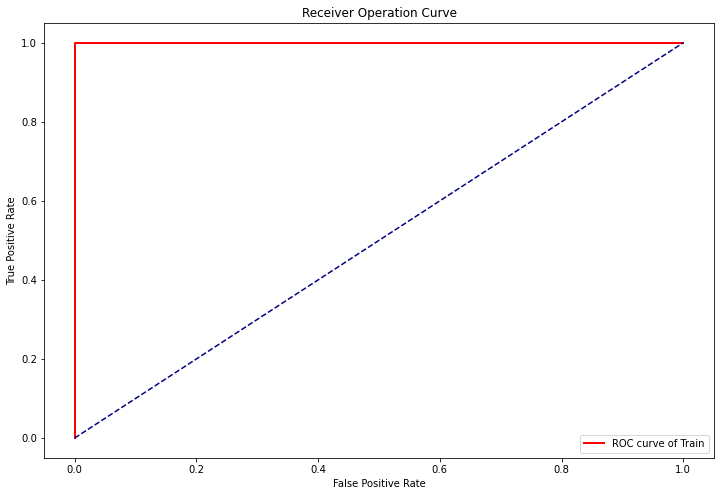

The AUC for train set is:  1.0


In [389]:
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train_up, Y_trainup_prob, pos_label = 1)
plt.figure(figsize = (12,8))
plt.plot(fpr_train, tpr_train, lw = 2, color = "red", label = "ROC curve of Train")
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlabel ('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operation Curve')
plt.legend(loc = "lower right")
plt.show()

trainAUC = roc_auc_score(Y_train_up, Y_trainup_prob)
print("The AUC for train set is: ", trainAUC)

In [390]:
X_test = test_df[selected_feature1]
Y_test_pred = reg1.predict(X_test)
Y_test_prob = reg1.predict_proba(X_test)[:,1]
cm2 = confusion_matrix(Y_test,Y_test_pred)
print("The confusion matrix is:\n", cm2)

The confusion matrix is:
 [[15  0]
 [ 0  4]]


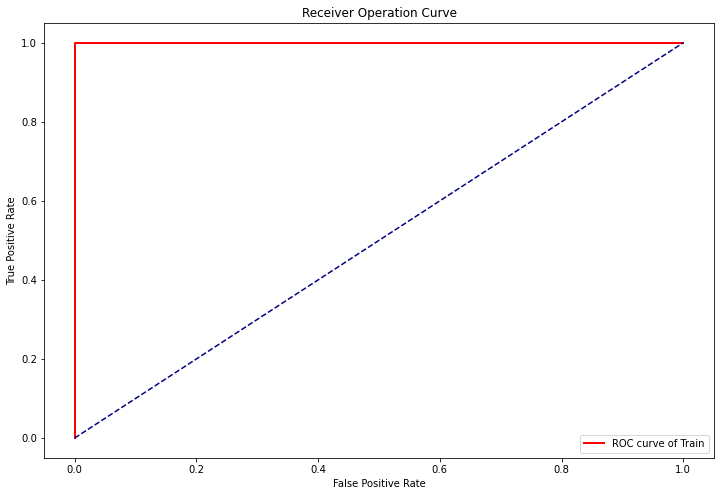

The AUC for train set is:  1.0


In [391]:
fpr_train, tpr_train, thresholds_train = roc_curve(Y_test, Y_test_prob, pos_label = 1)
plt.figure(figsize = (12,8))
plt.plot(fpr_train, tpr_train, lw = 2, color = "red", label = "ROC curve of Train")
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlabel ('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operation Curve')
plt.legend(loc = "lower right")
plt.show()

trainAUC = roc_auc_score(Y_test, Y_test_prob)
print("The AUC for train set is: ", trainAUC)

(e) Binary Classification Using L1-penalized logistic regression
i. Repeat 1(d)iii using L1-penalized logistic regression, i.e. instead of using p- values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.

In [392]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import normalize


accuracy = []
fscore = []
Cvalue = []

for l in range(1,L+1,1):
    
    X_train = data_split(alltrain,l)
    # standardized trainning dataset using L1 norm.
    X_train = normalize(X_train, norm = 'l1')
    
    reg = LogisticRegressionCV(penalty='l1', solver='liblinear',cv=StratifiedKFold(5, shuffle = True),random_state = 0).fit(X_train,Y_train) 

    f_score = f1_score(Y_train, reg.predict(X_train))
    fscore.append(f_score)
    Cvalue.append(reg.C_)
    accuracy.append(reg.score(X_train,Y_train))
    

In [393]:
df_l1 = pd.DataFrame(columns=["C","f1-score","accuracy"])
df_l1["C"]=Cvalue
df_l1["f1-score"]=fscore
df_l1["accuracy"]=accuracy
df_l1

,C,f1-score,accuracy
0,[166.81005372000558],1.000000,1.000000
1,[166.81005372000558],1.000000,1.000000
2,[166.81005372000558],1.000000,1.000000
3,[166.81005372000558],1.000000,1.000000
4,[1291.5496650148827],1.000000,1.000000
5,[166.81005372000558],1.000000,1.000000
6,[1291.5496650148827],1.000000,1.000000
7,[10000.0],1.000000,1.000000
8,[10000.0],1.000000,1.000000
9,[166.81005372000558],0.941176,0.985507


The best L is 8 because the C value is higher, which means that it gives more weight on the training set and less regularization. 

ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

In [394]:
from sklearn.metrics import accuracy_score 
X_test = data_split(alltest,8)
X_train = data_split(alltrain, 8)
# standardized trainning dataset using L1 norm.
X_test = normalize(X_test, norm = 'l1')
X_train = normalize(X_train, norm = 'l1')

reg2 = LogisticRegression(penalty='l1', solver='liblinear',C=10000).fit(X_train,Y_train)
Y_pred = reg2.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

print(accuracy)

0.9473684210526315


<b>From the results, the variable selection method with an accuracy score of 0.98 is better than L1-penalized method with an accuracy of 0.95, although L1-penalized method is easier to implement, with less computation cost. 

(f) Multi-class Classification (The Realistic Case)
i. Find the best l in the same way as you found it in 1(e)i to build an L1- penalized multinomial regression model to classify all activities in your train- ing set. Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem
if possible.

In [397]:
Cvalue2 = []
fscore2 = []
accuracy2 = []
select_features_df2 = {}

for l in range(1,L+1,1):
    X_train = data_split(alltrain,l)
    X_train = normalize(X_train, norm = 'l1')
    
    reg = LogisticRegressionCV(cv=StratifiedKFold(3), penalty='l1', multi_class='multinomial',solver='saga', random_state = 0)
    reg = reg.fit(X_train,Y_train)
    f_score = f1_score(Y_train, reg.predict(X_train))
    fscore2.append(f_score)
    accuracy2.append(reg.score(X_train,Y_train))
    Cvalue2.append(reg.C_[0])

[1291.54966501]
[1291.54966501]
[10000.]
[10000.]
[10000.]
[10000.]
[10000.]
[0.00077426]
[0.00077426]
[0.00077426]
[0.00077426]
[0.00077426]
[0.00077426]
[0.00077426]
[0.00077426]
[0.00077426]
[0.00077426]
[0.00077426]
[0.00077426]
[0.00077426]


In [399]:
df_multi = pd.DataFrame(columns=["C","f1-score","accuracy"])
df_multi["C"]=Cvalue2
df_multi["f1-score"]=fscore2
df_multi["accuracy"]=accuracy2
df_multi

,C,f1-score,accuracy
0,1291.549665,0.941176,0.985507
1,1291.549665,0.800000,0.956522
2,10000.000000,0.800000,0.956522
3,10000.000000,0.800000,0.956522
4,10000.000000,0.800000,0.956522
5,10000.000000,0.800000,0.956522
6,10000.000000,0.714286,0.942029
7,0.000774,0.000000,0.869565
8,0.000774,0.000000,0.869565
9,0.000774,0.000000,0.869565


In [401]:
best_c = Cvalue2[0]

<b>The best L is 1 with an accuracy score of 0.98

ISLR 3.7.4

<b>(a) Even though the true relationship between X and Y is linear, we would expect that the cubic regression will have less RSS then the linear regression, because the cubic regression tends to be more flexible, meaning that it can fit more points (even the outliers) then the linear regression. 

<b>(b) As what was said in (a), cubic regression will even fit the outliers better than the linear regression which may lead to the overfitting on the training dataset, and also at the expense of accuracy on the true relationship between the predictors and the targets. I would expect the cubic regression has higher RSS than the linear regression on the test set. 

<b>(c) I believe the RSS will be still smaller with cubic regression in this case because of its flexibility. Same reason as I said in (a). 

<b>(d) In this case, we can't tell only from the information given, because we don't know how the dataset looks like. For example, will there be a lot outliers, and how far the outliers are from the true relationship between X and Y. We can't determine whether the linear regression or the cubic regression will fit the data better when we don't know how 'curvy' the real relationship is. 

ISLR, 4.7.3

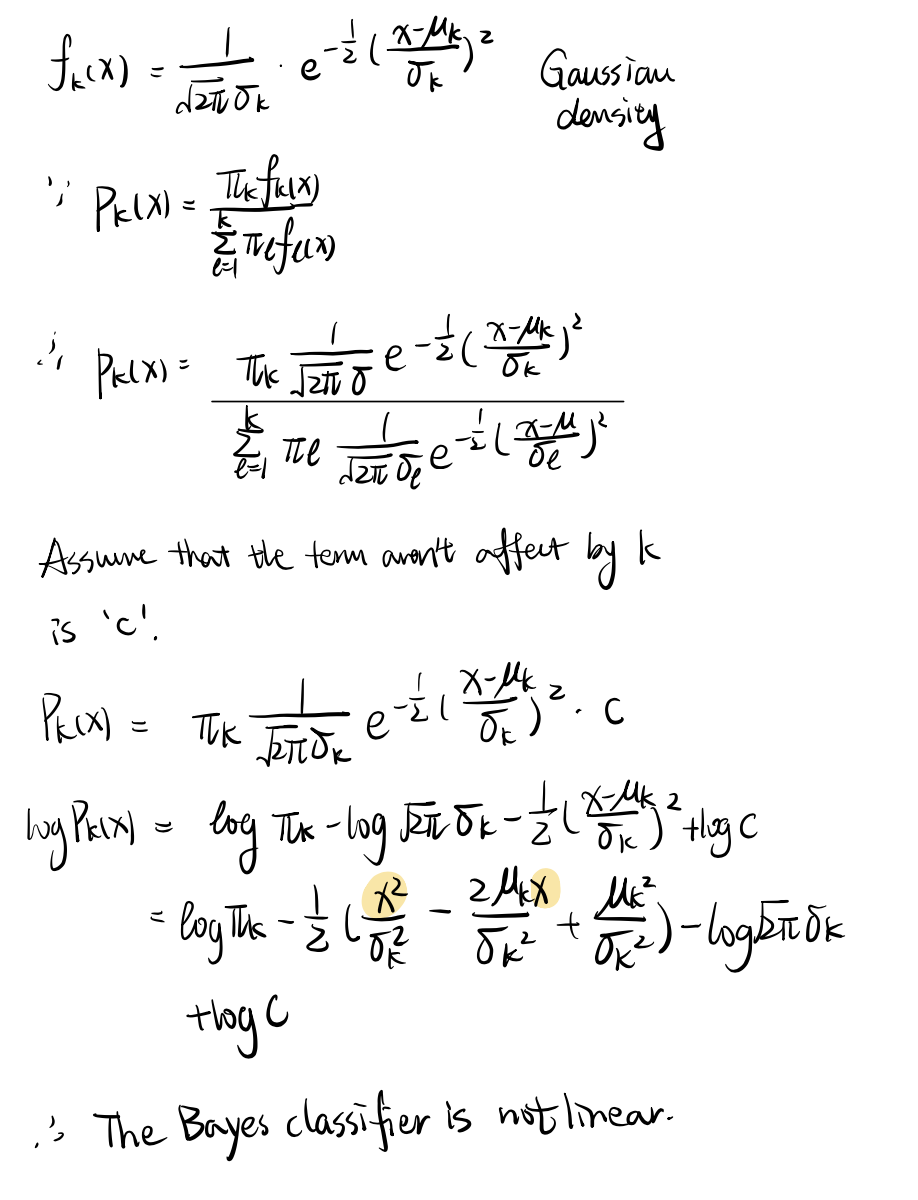

ISLR 4.7.7

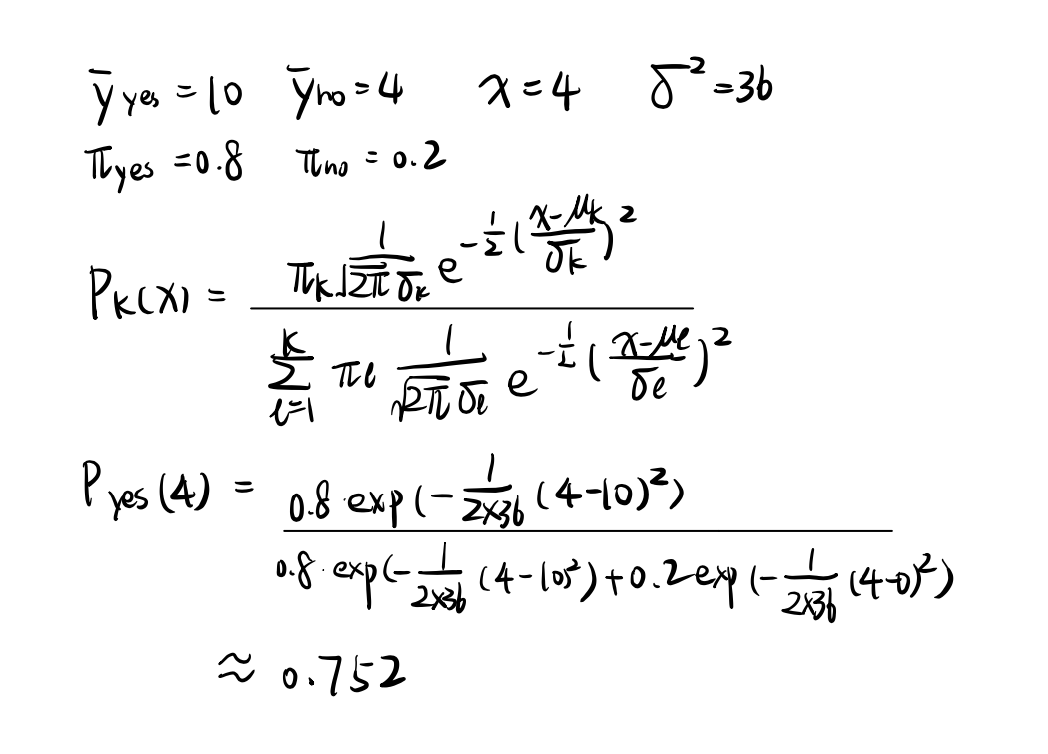